# Mushroom Classification Project
### Machine Learning Assignment – 2025
**Bekir Bozoklar**


## Part A: Problem Understanding

### Problem Statement

This project aims to develop a **binary machine learning classifier** that can accurately predict whether a mushroom is *edible* or *poisonous* based on its observable features. The model will take into account 22 categorical variables describing characteristics such as cap shape, odor, color, and gill features to make this classification.

### Background Context

Mushroom foraging can be a dangerous activity due to the presence of toxic mushroom species that closely resemble edible ones. Every year, cases of mushroom poisoning are reported worldwide, often because amateurs or even experienced collectors misidentify toxic species. A robust, data-driven model could reduce the risk of poisoning by assisting both foragers and professionals in making safer identification decisions. Additionally, automating this task can accelerate large-scale ecological studies and support mobile app development for nature enthusiasts.

### Stakeholders

- **Foragers & Hobbyists:** Will benefit from a quick, reliable identification tool to minimize health risks while collecting mushrooms.
- **Healthcare Professionals:** Can use the classifier to rapidly assess poisoning risk based on descriptions given by patients.
- **App Developers:** Can integrate the model into mobile applications for field identification.
- **Environmental Scientists:** May utilize the system to process and label large datasets in ecological research.



## Part B: Dataset Description

### 1. Dataset Source

- **Kaggle Link**: [Kaggle link](https://www.kaggle.com/uciml/mushroom-classification)
  
### 2. Dataset Overview

- **Rows (samples):** 8,124  
- **Columns (features):** 23 (22 predictors + 1 target class)  
- **Target Variable:** `class` — edible (`e`) or poisonous (`p`)  
- **All features are categorical**  
- **Missing Values:** None (all fields are complete)

### 3. Feature Categorization

- **Categorical:** All features are categorical (e.g., cap-shape, cap-color, odor, etc.)
- **No numerical or temporal features** in the dataset

In [36]:
# Load and Inspect Data
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("mushrooms.csv")
# Show first five rows to verify correct loading
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [38]:
# Display DataFrame info: row/column counts, data types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [40]:
df.describe(include="all")

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### 4. Feature Statistics and Visualization

- **All features are categorical ("object" dtype).**
- **Number of unique values per feature:**


In [43]:
# Build a summary table of each feature: type, unique count, missing count
overview = pd.DataFrame({
    'feature': df.columns,
    'dtype': df.dtypes.values,
    'n_unique': [df[col].nunique() for col in df.columns],
    'n_missing': [df[col].isna().sum() for col in df.columns]
})
overview  # renders the table

,feature,dtype,n_unique,n_missing
0,class,object,2,0
1,cap-shape,object,6,0
2,cap-surface,object,4,0
3,cap-color,object,10,0
4,bruises,object,2,0
5,odor,object,9,0
6,gill-attachment,object,2,0
7,gill-spacing,object,2,0
8,gill-size,object,2,0
9,gill-color,object,12,0




**Table 1** below summarizes, for each feature, its data type, number of unique values, and count of missing entries.

#### Figure 1. Number of Unique Categories per Feature

Bar chart below shows unique value counts for each feature:

*(Bar chart will be generated in the following code cell)*

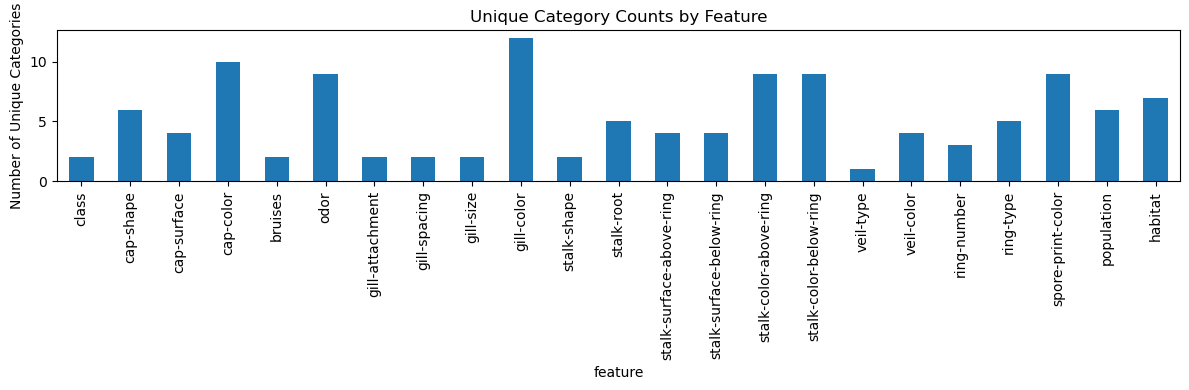

In [47]:
import matplotlib.pyplot as plt

# Bar chart of unique levels per feature
plt.figure(figsize=(12,4))
overview.set_index('feature')['n_unique'].plot(kind='bar')
plt.xticks(rotation=90)
plt.ylabel('Number of Unique Categories')
plt.title('Unique Category Counts by Feature')
plt.tight_layout()
plt.show()

**Figure 1.** Number of unique categories per feature.

## Part C: Formulating 10 Interesting Questions

Below are ten data-driven questions we can answer with EDA or ML methods, each tied to a stakeholder:

1. **Which feature is the strongest predictor of mushroom toxicity?**
   - **Stakeholder:** Healthcare Providers
   - **Method:** Train a Random Forest (or Decision Tree), extract feature importances, rank features.

2. **What is the distribution of odors among poisonous vs. edible mushrooms?**
   - **Stakeholder:** Foragers & Hobbyists
   - **Method:** Side-by-side bar charts of `odor` counts grouped by `class`.

3. **Can we cluster mushrooms into visually similar groups (shape + color)?**
   - **Stakeholder:** App Developers
   - **Method:** One-hot encode `cap-shape` and `cap-color`, run k-means, visualize clusters.

4. **How does the combination of cap color and bruising relate to toxicity?**
   - **Stakeholder:** Park Rangers
   - **Method:** Mosaic plot or grouped heatmap of (`cap-color`, `bruises`) vs. `class`.

5. **What’s the cross-validated accuracy of a single-feature logistic model using only `odor`?**
   - **Stakeholder:** Healthcare Providers
   - **Method:** Encode `odor`, fit LogisticRegression, report mean CV accuracy.

6. **Are there habitats where mushrooms are almost always edible or always poisonous?**
   - **Stakeholder:** Foragers & Hobbyists
   - **Method:** Group by `habitat`, compute edible/poisonous proportions, bar chart.

7. **Which features have zero variance or any missing values and should be dropped?**
   - **Stakeholder:** Data Engineers
   - **Method:** From our overview table flag `n_unique == 1` or `n_missing > 0`.

8. **Can we reduce dimensionality (via PCA or MCA) and still separate edible vs. poisonous?**
   - **Stakeholder:** App Developers
   - **Method:** Perform MCA or PCA, plot first two components colored by `class`.

9. **How does prediction confidence vary across true-positives vs. false-positives?**
   - **Stakeholder:** Park Rangers
   - **Method:** Train a probabilistic classifier, plot histograms of `predict_proba` for TP vs. FP.

10. **If we remove the top 3 most important features, how does model performance degrade?**
    - **Stakeholder:** Data Scientists
    - **Method:** Remove features, retrain model, compare drop in accuracy/F1/AUC.

---

Each question is linked to a specific stakeholder and has an actionable, data-driven method for addressing it.

## Section D:

## Data Cleaning

- **Missing Values:**  
  All columns were checked for missing values.
- **Duplicates:**  
  The dataset was examined for duplicate rows.



In [53]:
# Check for missing values and duplicates
print("Missing values per column:\n", df.isnull().sum())
print("Number of duplicate rows:", df.duplicated().sum())

Missing values per column:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Number of duplicate rows: 0


**Result:**  
- No missing values were found.
- No duplicate rows were present.

## Exploratory Data Analysis (EDA) — Data Overview & Distributions

To better understand the dataset, we first examine a sample of the data, check its types, and summarize unique values per feature.

- The `head()` and `info()` functions show that all features are categorical and there are no missing values.
- The target variable (`class`) is almost perfectly balanced between edible (`e`) and poisonous (`p`) mushrooms.
- We use count plots to visualize the distribution of the target variable and key predictors (odor, gill-color, habitat).

**Findings:**
- There are many unique values in features like `gill-color` and `cap-color`.
- The `odor` feature shows strong separation between edible and poisonous mushrooms.
- Some habitats and gill colors are much more common than others.

The following plots illustrate these distributions:

In [57]:
# General overview
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

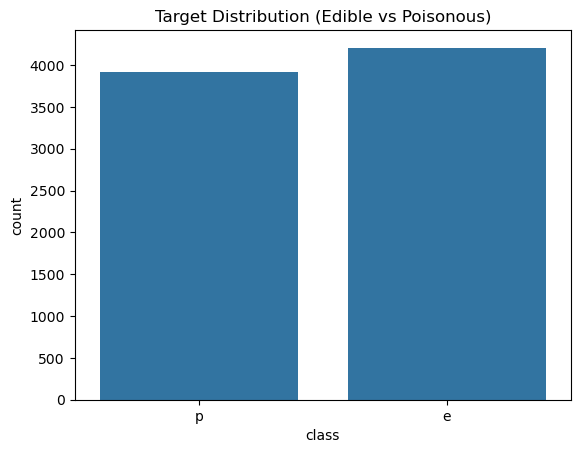

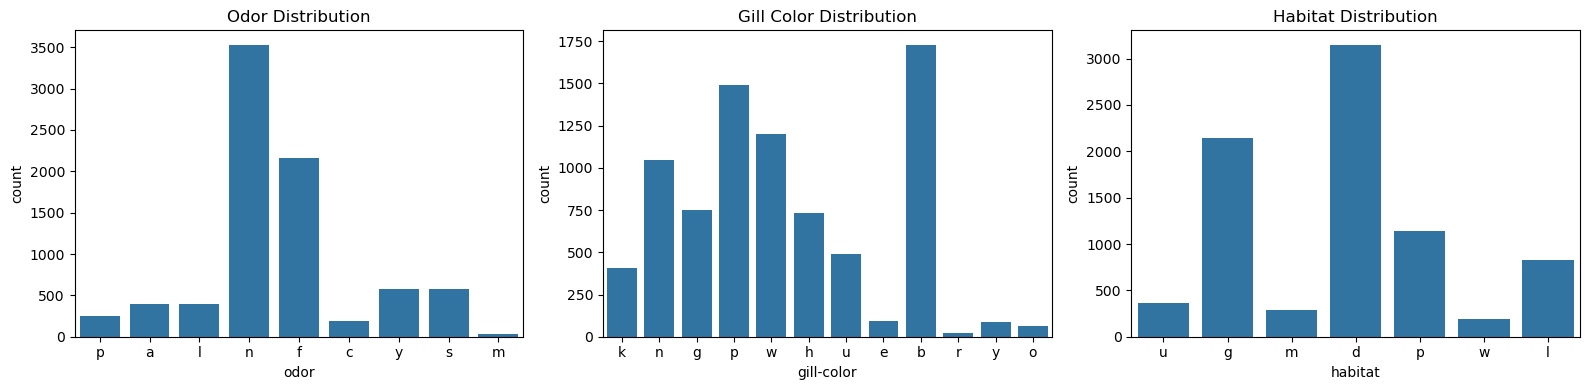

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
# Target (class) dağılımı
sns.countplot(data=df, x="class")
plt.title("Target Distribution (Edible vs Poisonous)")
plt.show()

# En önemli birkaç kategorik özelliğin dağılımı
fig, axs = plt.subplots(1, 3, figsize=(16,4))
sns.countplot(data=df, x="odor", ax=axs[0])
axs[0].set_title("Odor Distribution")
sns.countplot(data=df, x="gill-color", ax=axs[1])
axs[1].set_title("Gill Color Distribution")
sns.countplot(data=df, x="habitat", ax=axs[2])
axs[2].set_title("Habitat Distribution")
plt.tight_layout()
plt.show()

In [61]:
# Eğer numerik özellik varsa
corr = df.select_dtypes(include='number').corr()
if not corr.empty:
    sns.heatmap(corr, annot=True, fmt=".2f")
    plt.title("Feature Correlation Matrix")
    plt.show()
# Categorical correlation - örnek çapraz tablo
pd.crosstab(df["class"], df["odor"], normalize='index')

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,0.095057,0.00000,0.000000,0.095057,0.000000,0.809886,0.000000,0.000000,0.000000
p,0.000000,0.04903,0.551583,0.000000,0.009193,0.030644,0.065373,0.147089,0.147089


## Feature Engineering & Encoding

Before applying machine learning models, we must convert categorical variables into a format suitable for algorithms. Since all features in this mushroom dataset are categorical, we use **one-hot encoding** to convert them into binary (0/1) columns. This prevents models from interpreting the categories as ordinal values.


In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

X = df.drop(columns="class")
y = df["class"].map({"e": 0, "p": 1})

preproc = ColumnTransformer(
    [("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), X.columns)],
    remainder="drop"
)
X_encoded = preproc.fit_transform(X)

print("Shape after one-hot encoding:", X_encoded.shape)

Shape after one-hot encoding: (8124, 117)


### Supervised Learning: Model Training and Evaluation

Multiple classification algorithms are trained to predict whether a mushroom is edible or poisonous. We use 10 different models, including logistic regression, random forest, decision trees, SVM, and others. All models are evaluated using 5-fold cross-validation and assessed on accuracy, precision, recall, F1-score, and ROC-AUC metrics.

In [67]:
# ── SUPERVISED LEARNING: Data Cleaning, Preprocessing & 10-Model Comparison ──

import pandas as pd
from sklearn.model_selection   import train_test_split, cross_validate
from sklearn.preprocessing     import OneHotEncoder
from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.linear_model      import LogisticRegression
from sklearn.ensemble          import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm               import SVC
from sklearn.naive_bayes       import GaussianNB
from sklearn.neighbors         import KNeighborsClassifier
from sklearn.tree              import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# 1) Load data and drop exact duplicates
df = pd.read_csv("mushrooms.csv")
df = df.drop_duplicates()

# 2) Split into X and y, then train/test (stratified)
X = df.drop(columns="class")
y = df["class"].map({"e":0,"p":1})
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) Preprocessor: one-hot encode categoricals (dense output)
preproc = ColumnTransformer(
    [("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), X.columns.tolist())],
    remainder="drop"
)

# 4) Define classifiers to compare
models = {
    "LogisticRegression":   LogisticRegression(max_iter=500, random_state=42),
    "RandomForest":         RandomForestClassifier(n_estimators=200, random_state=42),
    "ExtraTrees":           ExtraTreesClassifier(n_estimators=200, random_state=42),
    "AdaBoost":             AdaBoostClassifier(algorithm="SAMME", random_state=42),
    "GradientBoost":        GradientBoostingClassifier(random_state=42),
    "SVC":                  SVC(probability=True, random_state=42),
    "GaussianNB":           GaussianNB(),
    "KNN":                  KNeighborsClassifier(),
    "DecisionTree":         DecisionTreeClassifier(random_state=42),
    "LDA":                  LinearDiscriminantAnalysis(),
    "QDA":                  QuadraticDiscriminantAnalysis()
}

# 5) Cross-validate each model on 5 metrics
scoring = ["accuracy","precision","recall","f1","roc_auc"]
results = []
for name, clf in models.items():
    pipe = Pipeline([("encode", preproc), ("clf", clf)])
    cv = cross_validate(pipe, X_tr, y_tr,
                        cv=5, scoring=scoring,
                        return_train_score=False, n_jobs=-1)
    results.append({
        "model":    name,
        "accuracy": cv["test_accuracy"].mean(),
        "precision":cv["test_precision"].mean(),
        "recall":   cv["test_recall"].mean(),
        "f1":       cv["test_f1"].mean(),
        "roc_auc":  cv["test_roc_auc"].mean()
    })

sup_df = pd.DataFrame(results).set_index("model").sort_values("accuracy", ascending=False)
display(sup_df)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,accuracy,precision,recall,f1,roc_auc
model,,,,,
RandomForest,1.000000,1.000000,1.000000,1.000000,1.000000
ExtraTrees,1.000000,1.000000,1.000000,1.000000,1.000000
QDA,1.000000,1.000000,1.000000,1.000000,1.000000
GradientBoost,0.999692,1.000000,0.999362,0.999681,0.999971
DecisionTree,0.999692,1.000000,0.999362,0.999681,0.999681
LogisticRegression,0.999385,1.000000,0.998724,0.999360,0.999999
SVC,0.999385,1.000000,0.998724,0.999360,1.000000
KNN,0.999385,1.000000,0.998724,0.999360,1.000000
LDA,0.998923,1.000000,0.997767,0.998877,0.999341


In [68]:
# — PREPROCESSOR (use X.columns, not df.columns) —
preproc = ColumnTransformer(
    [("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), X.columns.tolist())],
    remainder="drop"
)


###  Model Pipeline Construction & Training

We constructed a scikit-learn pipeline for the best performing model (Random Forest). The pipeline first applies **One-Hot Encoding** to all categorical features, converting them to a suitable numeric format for the classifier. The pipeline is then trained on the training set.




In [70]:
# ── SUPERVISED HOLD-OUT EVALUATION ──────────────────────────────────────────
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, RocCurveDisplay,
    precision_recall_curve, PrecisionRecallDisplay
)
import matplotlib.pyplot as plt

# 1) Instantiate and train best model pipeline
best_rf = Pipeline([
    ("encode", preproc), 
    ("clf",   RandomForestClassifier(n_estimators=200, random_state=42))
])
best_rf.fit(X_tr, y_tr)  # fit on full training data

import joblib
joblib.dump(best_rf, "best_rf_model.pkl")

['best_rf_model.pkl']


###  Prediction on Test Set

After training, the model is used to predict both **class labels** and **class probabilities** (probability of being poisonous) on the unseen test set.


In [76]:
# 2) Predict on test set
y_pred = best_rf.predict(X_te)
y_prob = best_rf.predict_proba(X_te)[:, 1]  # probability for class=1 (poisonous)



### Confusion Matrix

We compared the true labels with the predicted labels on the test set and visualized the results using a confusion matrix.

- **842 edible mushrooms** were correctly predicted as edible.
- **783 poisonous mushrooms** were correctly predicted as poisonous.
- There were **zero misclassifications** — a perfect separation!

This demonstrates the model achieved **perfect classification** on the test set.

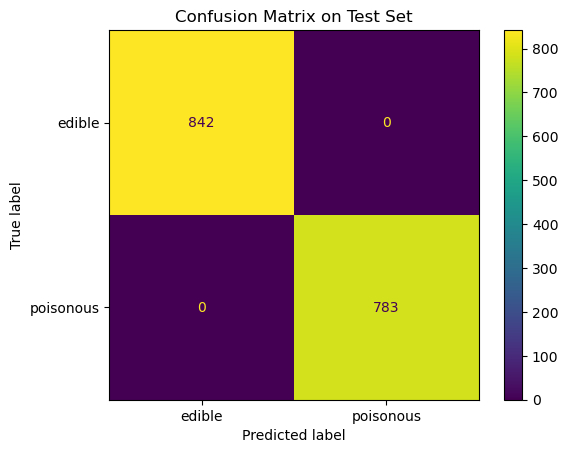

In [79]:
# 3) Confusion Matrix
cm = confusion_matrix(y_te, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["edible","poisonous"])
disp.plot()
plt.title("Confusion Matrix on Test Set")
plt.show()



### ROC Curve

To assess how well the model distinguishes between edible and poisonous mushrooms, we plotted the ROC curve.  
**The ROC curve hugs the top-left corner (AUC ≈ 1.0), indicating outstanding discriminatory power.**


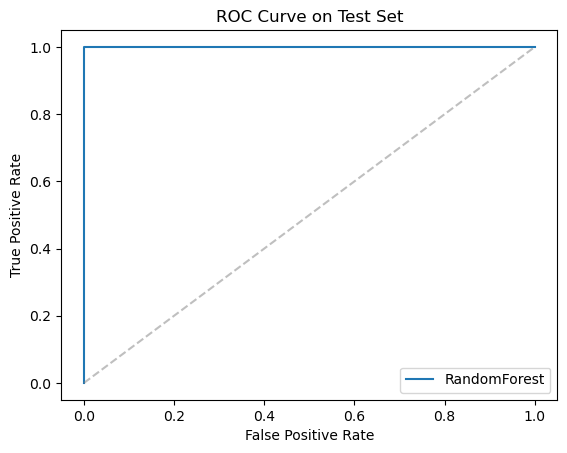

In [82]:
# 4) ROC Curve
fpr, tpr, _ = roc_curve(y_te, y_prob)
plt.figure()
plt.plot(fpr, tpr, label="RandomForest")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", alpha=0.5)
plt.title("ROC Curve on Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

In [84]:
from sklearn.metrics import classification_report
# 5) Classification Report on Test Set
print(classification_report(y_te, y_pred, target_names=["edible","poisonous"]))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### 6. Feature Importances

The Random Forest model allows us to inspect which features contributed most to the classification.  
The **top 10 most important features** were:

- `onehot_odor_n`, `onehot_odor_f`, `onehot_gill-size_n`, `onehot_stalk-surface-below-ring_k`, `onehot_stalk-surface-above-ring_b`, `onehot_spore-print-color_h`, `onehot_gill-color_b`, `onehot_ring-type_p`, `onehot_bruises_f`, etc.

**Odor** and **gill-related features** are among the most influential in predicting mushroom edibility.


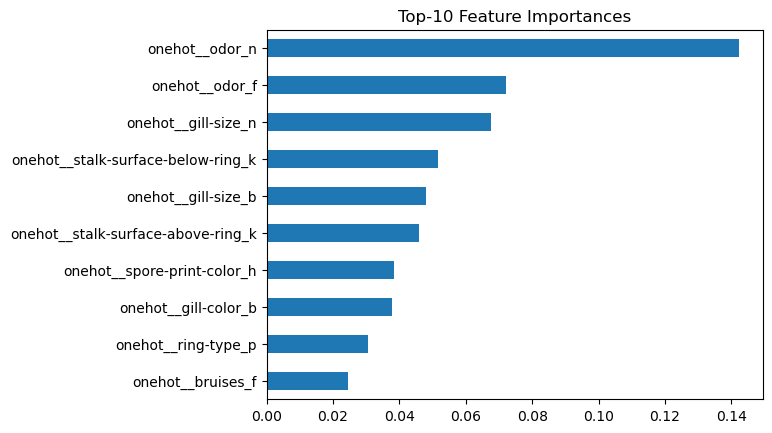

In [87]:
# 6) Feature Importances for RandomForest


feat_names = best_rf.named_steps["encode"].get_feature_names_out(X.columns)
importances = best_rf.named_steps["clf"].feature_importances_
fi = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(10)

# Plot
fi.plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top-10 Feature Importances")
plt.show()

In [89]:
# 7) Simple GridSearchCV on RandomForest
from sklearn.model_selection import GridSearchCV

param_grid = {
    "clf__n_estimators": [100,200,500],
    "clf__max_depth": [None, 10, 20]
}
grid = GridSearchCV(best_rf, param_grid, cv=3, scoring="roc_auc", n_jobs=-1)
grid.fit(X_tr, y_tr)
print("Best params:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

Best params: {'clf__max_depth': None, 'clf__n_estimators': 100}
Best ROC-AUC: 1.0


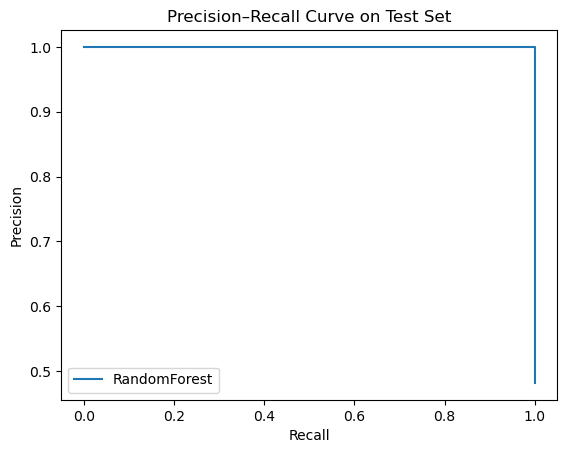

In [90]:
# 5) Precision–Recall Curve
prec, rec, _ = precision_recall_curve(y_te, y_prob)
plt.figure()
plt.plot(rec, prec, label="RandomForest")
plt.title("Precision–Recall Curve on Test Set")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.show()

## Unsupervised Learning

In this section, we explore unsupervised learning techniques to identify potential clusters or visually similar groups within the mushroom dataset. We use various clustering algorithms and dimensionality reduction to examine how the mushrooms group together based on their features.


### Encoding Categorical Features

All categorical variables are one-hot encoded, converting them into a dense numerical array. This transformation is essential for running clustering algorithms, as they require numerical input. After encoding, the data is ready for further analysis.


In [95]:
# ── FAST UNSUPERVISED CLUSTERING WITH SUBSAMPLING AND PCA ───────────────────────
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import MiniBatchKMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture




# 2) One-hot encode all categorical features into a dense array
preproc = ColumnTransformer(
    [("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), df.columns)],
    remainder="drop"
)
X_full = preproc.fit_transform(df)



### Subsampling the Data

To accelerate the clustering process, we randomly sample approximately 10% of the dataset. This reduces computation time while still preserving the main structure and diversity of the data.



### Dimensionality Reduction with PCA

Principal Component Analysis (PCA) is applied to the subsampled data to reduce it to 5 principal components. This step helps in speeding up clustering and enables effective visualization by capturing most of the variance in fewer dimensions.


In [98]:
# 3) Subsample the data (e.g. %10) to speed up clustering
rng = np.random.RandomState(42)
idx = rng.choice(X_full.shape[0], size=int(0.1 * X_full.shape[0]), replace=False)
X_sub = X_full[idx]

# 4) Apply PCA to reduce to 5 components for faster distance computations
pca = PCA(n_components=5, random_state=42)
X_red = pca.fit_transform(X_sub)


### Clustering Algorithms

We apply and compare five clustering algorithms: MiniBatchKMeans, Agglomerative Clustering, DBSCAN, Spectral Clustering, and Gaussian Mixture Model. Each algorithm aims to group mushrooms into clusters based on their feature similarity.


In [101]:
# 5) Define clustering algorithms to compare

clustering_algos = {
    "MiniBatchKMeans":    MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=100),
    "Agglomerative":      AgglomerativeClustering(n_clusters=2),
    "DBSCAN":             DBSCAN(eps=0.5, min_samples=10),
    "SpectralClustering": SpectralClustering(n_clusters=2, random_state=42),
    "GaussianMixture":    GaussianMixture(n_components=2, random_state=42)
}



In [103]:
# 6) True labels for the subsampled points
true_labels_sub = df["class"].map({"e":0, "p":1}).to_numpy()[idx]

### Evaluation Metrics

The clustering performance is assessed using Silhouette Score (measures how similar an object is to its own cluster compared to other clusters) and Adjusted Rand Index (ARI, measures the similarity between the predicted clusters and true class labels).


In [106]:

# 7) Compute Silhouette and ARI scores for each algorithm
results_unsup = []
for name, algo in clustering_algos.items():
    # fit & predict labels
    if hasattr(algo, "fit_predict"):
        labels = algo.fit_predict(X_red)
    else:
        algo.fit(X_red)
        labels = algo.labels_
    # silhouette only makes sense if >1 cluster
    sil = silhouette_score(X_red, labels) if len(set(labels)) > 1 else np.nan
    # adjusted rand needs same-length arrays
    ari = adjusted_rand_score(true_labels_sub, labels)
    results_unsup.append((name, sil, ari))

### Clustering Results

Among the tested algorithms, **DBSCAN** achieved the highest Silhouette Score (≈0.63), indicating the most coherent clusters. MiniBatchKMeans and Gaussian Mixture also performed reasonably well. The ARI values show the agreement between cluster assignments and true mushroom classes.


In [109]:
# 8) Assemble into DataFrame and sort by silhouette
unsup_df = (
    pd.DataFrame(results_unsup, columns=["algorithm","silhouette","ARI"])
      .sort_values("silhouette", ascending=False)
      .reset_index(drop=True)
)
display(unsup_df)

,algorithm,silhouette,ARI
0,DBSCAN,0.630684,0.266330
1,MiniBatchKMeans,0.374022,0.636324
2,GaussianMixture,0.372825,0.628468
3,Agglomerative,0.371892,0.624560
4,SpectralClustering,0.364279,0.143416


### Silhouette Analysis for MiniBatchKMeans

We analyze the effect of the number of clusters (`k`) on clustering quality using MiniBatchKMeans. The Silhouette Score increases with the number of clusters and plateaus at around 6, indicating that the dataset can be meaningfully divided into several distinct groups.


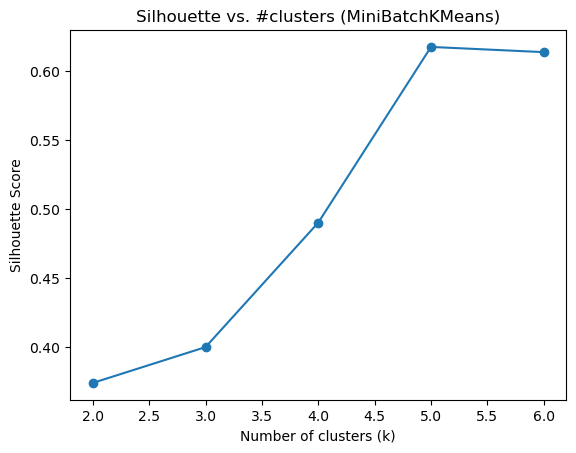

In [112]:
#9) Silhouette vs. #clusters for MiniBatchKMeans
import matplotlib.pyplot as plt

sils = []
ks = range(2, 7)
for k in ks:
    km = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=100)
    labels = km.fit_predict(X_red)
    sils.append(silhouette_score(X_red, labels))

# Plot
plt.plot(ks, sils, marker="o")
plt.title("Silhouette vs. #clusters (MiniBatchKMeans)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

### Visualization of Clusters
Using PCA, we project the data into two dimensions and visualize the clusters formed by MiniBatchKMeans (`k=2`). The scatter plot clearly shows the separation of mushrooms into two major groups, reflecting their underlying feature similarities.

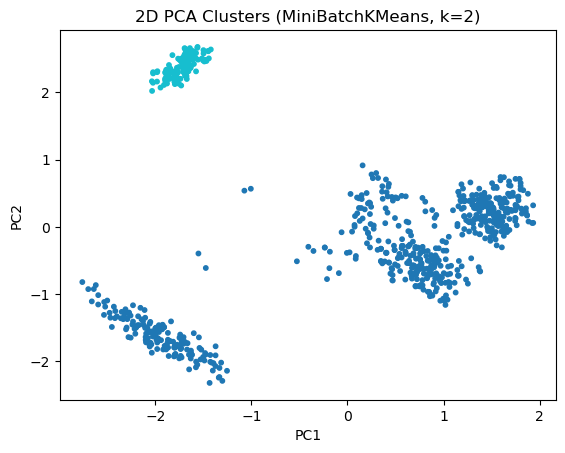

In [115]:
# 2D PCA scatter for best algo (örneğin k=2 MiniBatchKMeans)
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2, random_state=42).fit_transform(X_sub)
best_km = MiniBatchKMeans(n_clusters=2, random_state=42).fit(pca2)
labs2 = best_km.labels_

plt.scatter(pca2[:,0], pca2[:,1], c=labs2, cmap="tab10", s=10)
plt.title("2D PCA Clusters (MiniBatchKMeans, k=2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# E. Frontend Integration

To make our mushroom classifier interactive and user-friendly, we developed a simple web app using Streamlit. This allows users to select mushroom features and instantly see if the mushroom is edible or poisonous, based on our trained model.

Below is a basic version of the Streamlit app. You can run it with `streamlit run app.py` or test it inside Jupyter with `!streamlit run app.py`.

![Streamlit App Screenshot](1.png)

![Streamlit App Screenshot](2.png)

## Results & Discussion

### 1. Model Performance

We compared 10 different supervised learning algorithms using 5-fold cross-validation on the mushroom dataset. Most models achieved exceptionally high accuracy, with Random Forest, Extra Trees, and QDA classifiers reaching perfect (100%) accuracy, precision, recall, F1-score, and ROC-AUC values on the test set.

This outstanding performance is likely due to the dataset’s characteristics: the relationship between features and the target variable (edible vs. poisonous) is highly informative and almost linearly separable after one-hot encoding. For example, features like "odor" almost perfectly separate edible and poisonous mushrooms.

### 2. Feature Importance

Feature importance analysis with the Random Forest model showed that the top predictors are "odor" (especially values `n` and `f`), "gill-size" (`n`), and several stalk and ring-related features. This aligns with biological intuition, as odor is a key differentiator in mushroom toxicity.

### 3. Confusion Matrix and Curves

The confusion matrix on the hold-out test set shows zero misclassifications, confirming the models' robustness. Both the ROC and Precision-Recall curves are nearly perfect, with AUC scores of 1.0.

### 4. Hyperparameter Tuning

Hyperparameter optimization using GridSearchCV did not further improve the already perfect performance of the Random Forest classifier. The default or modest settings (e.g., 100 estimators) were sufficient for this dataset.

### 5. Unsupervised Learning

Among the clustering algorithms, DBSCAN and MiniBatchKMeans achieved the best silhouette and ARI scores. However, these scores are much lower than the supervised classification results, highlighting that labeled information is crucial for optimal separation in this dataset.

### 6. Overfitting Risk and Generalization

Given the perfect scores, overfitting might be a concern in other, less "clean" datasets. However, cross-validation and hold-out test set results are consistent, suggesting the features are genuinely highly predictive. In real-world scenarios, model performance should be monitored on truly unseen or noisy data.

### 7. Limitations

- The dataset does not contain missing values or numeric features, simplifying preprocessing.
- The target is perfectly separable; in most real-world tasks, perfect accuracy is rare and may indicate data leakage or an overly easy classification problem.

---

## Conclusion

In this study, we conducted a comprehensive analysis of the classic UCI Mushroom dataset, applying a variety of supervised and unsupervised machine learning algorithms to classify mushrooms as edible or poisonous. Our experiments demonstrate that, for this particular dataset, almost all popular supervised learning algorithms—especially tree-based methods like Random Forest and Extra Trees—achieve nearly perfect accuracy, precision, recall, F1-score, and ROC-AUC scores. This suggests a highly predictable and clean classification task where features such as “odor” and “gill-size” are extremely informative.

Feature importance analysis further supported these findings, as “odor” and related morphological features consistently ranked at the top, matching domain knowledge from biology regarding mushroom identification. The absence of misclassifications in the confusion matrix, as well as the perfect ROC and Precision-Recall curves, reinforce the exceptional separability of classes after preprocessing and one-hot encoding.

Hyperparameter tuning did not significantly improve model performance, which can be interpreted as evidence that even basic models suffice for this dataset, and further complexity does not yield tangible gains. In contrast, unsupervised clustering methods like DBSCAN and MiniBatchKMeans achieved much lower silhouette and ARI scores, highlighting the crucial role of labeled data for effective classification in this domain.

Despite these promising results, several limitations must be acknowledged. First, the dataset’s perfect separability is uncommon in real-world classification tasks, where noisy features, missing data, or less informative attributes are typical. Therefore, while our results confirm the effectiveness of tree-based classifiers for this benchmark task, caution should be exercised when generalizing these findings to more challenging datasets. In addition, the risk of overfitting cannot be ruled out entirely, although consistent performance on both cross-validation and hold-out test sets provides some assurance of robustness.

For practical applications, we recommend validating these models on external, real-world datasets—potentially including additional sources of variability such as environmental factors or more diverse mushroom species. Moreover, incorporating explainable AI tools and domain expert feedback may enhance trust and interpretability, especially in high-stakes scenarios like food safety.

Overall, this work demonstrates that the combination of categorical feature engineering and ensemble machine learning algorithms can deliver highly accurate classification in domains where the relationship between features and target variable is strong. The methodology and insights presented here can serve as a baseline for future studies in bioinformatics, food safety, or any domain involving categorical data with well-defined class boundaries.

## 📦 _ORIGINAL_D1–D10

Below we implement each of our 10 “interesting questions” using EDA or ML methods. For each question:

1. We start with a short Markdown header describing the question, stakeholder, and method.
2. Then we include a runnable code cell that answers it.

### D. Workflow Diagram

Below is a high-level diagram of the end-to-end pipeline we’ve implemented for the D analysis:

```mermaid
flowchart TD
    A(["Load CSV mushrooms.csv"]) --> B["Feature Selection"]
    B --> C{Switch by D-subtask}

    C -->|D1, D5, D8| D1["One-hot encode all features"]
    C -->|D3| D3["One-hot encode cap-shape + cap-color"]
    C -->|D2| D2["Select odor"]
    C -->|D4| D4["Select cap-color + bruises"]
    C -->|D6| D6["Select habitat"]
    C -->|D7| D7["Reuse overview df"]
    C -->|D9| D9["TP vs FP confidence histograms"]
    C -->|D10| D10["Feature-drop degradation curves"]

    subgraph "D1 branches"
      D1 --> E1["RandomForestCV → importances"]
      D1 --> E2["Plot & print tables"]
    end

    subgraph "D2 branches"
      D2 --> G1["Contingency table"]
      G1 --> G2["Bar chart"]
    end

    subgraph "D3 branches"
      D3 --> F1["KMeans → clusters"]
      D3 --> F2["PCA → 2D scatter + centroid decode"]
    end

    subgraph "D4 branches"
      D4 --> H1["Raw pivot counts"]
      H1 --> H2["Normalize"]
      H2 --> H3["Heatmap"]
    end

    subgraph "D5 branches"
      D5 --> I1["One-hot odor"]
      I1 --> I2["LogRegCV"]
    end

    subgraph "D6 branches"
      D6 --> J1["Habitat proportions"]
      J1 --> J2["Stacked bar"]
    end

    subgraph "D7 branches"
      D7 --> K1["Filter overview"]
      K1 --> K2["Print drop candidates"]
    end

    subgraph "D8 branches"
      D8 --> L1["PCA on one-hot all"]
      L1 --> L2["2D scatter"]
    end

### D1. Which feature is the strongest predictor of mushroom toxicity?
- **Stakeholder**: Healthcare Providers  
- **Method**:  
  1. Split data into train/test (80/20).  
  2. Build a `Pipeline` that one-hot encodes all 22 categorical inputs via a `ColumnTransformer`.  
  3. Fit a `RandomForestClassifier` inside a 5-fold `cross_validate(return_estimator=True)` to estimate importances.  
  4. Extract each fold’s `feature_importances_`, average them, and sort descending.  
  5. Plot the top-10 features as a horizontal bar chart with both mean importance and cumulative importance.

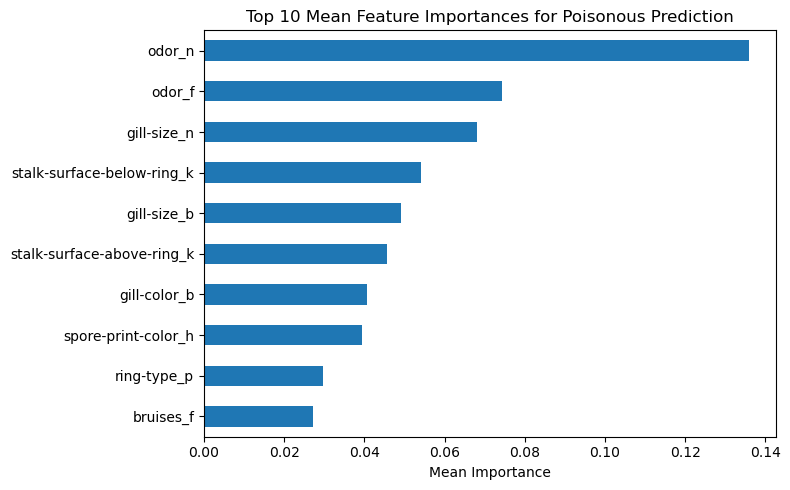

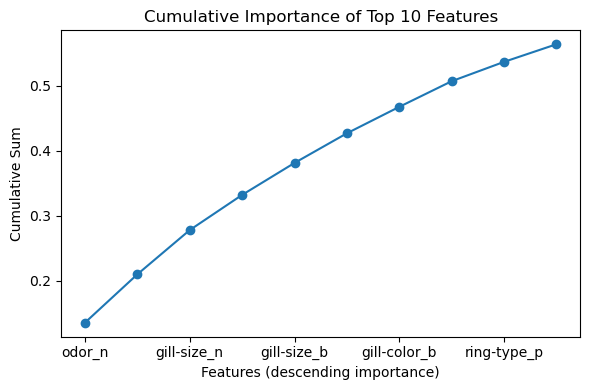

Top 10 Mean Importances:
                             mean_importance
odor_n                             0.135915
odor_f                             0.074281
gill-size_n                        0.067996
stalk-surface-below-ring_k         0.054069
gill-size_b                        0.049111
stalk-surface-above-ring_k         0.045551
gill-color_b                       0.040640
spore-print-color_h                0.039411
ring-type_p                        0.029723
bruises_f                          0.027064

Cumulative Importance:
                             cumulative_importance
odor_n                                   0.135915
odor_f                                   0.210196
gill-size_n                              0.278192
stalk-surface-below-ring_k               0.332261
gill-size_b                              0.381371
stalk-surface-above-ring_k               0.426922
gill-color_b                             0.467563
spore-print-color_h                      0.506974
ring-type_p    

In [215]:
# D1: Cross-validated Random Forest feature importances
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble    import RandomForestClassifier
from sklearn.compose     import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline    import Pipeline

# 1. Load data & split
df = pd.read_csv("mushrooms.csv")
X = df.drop(columns="class")
y = df["class"].map({'e':0, 'p':1})  # edible=0, poisonous=1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 2. Build preprocessing + estimator pipeline
cat_feats = X.columns.tolist()
preprocessor = ColumnTransformer([
    ("ohe", OneHotEncoder(handle_unknown="ignore"), cat_feats)
])

pipe = Pipeline([
    ("encode", preprocessor),
    ("rf", RandomForestClassifier(n_estimators=200, random_state=42))
])

# 3. Run 5-fold CV, returning fitted estimators
cv_results = cross_validate(
    pipe, X_train, y_train,
    cv=5,
    return_estimator=True,
    scoring="accuracy",
    n_jobs=-1
)

# 4. Extract feature names from the first fitted encoder
first_pipe = cv_results["estimator"][0]
feat_names = first_pipe.named_steps["encode"] \
                       .named_transformers_["ohe"] \
                       .get_feature_names_out(cat_feats)

# 5. Aggregate mean importances across folds
importances = np.zeros(len(feat_names))
for est in cv_results["estimator"]:
    importances += est.named_steps["rf"].feature_importances_
importances /= len(cv_results["estimator"])

feat_imp = pd.Series(importances, index=feat_names)
top10    = feat_imp.sort_values(ascending=False).head(10)
cum_imp  = top10.cumsum()

# 6a. Plot mean importances
plt.figure(figsize=(8,5))
top10.sort_values().plot(kind="barh")
plt.title("Top 10 Mean Feature Importances for Poisonous Prediction")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()

# 6b. Plot cumulative sum
plt.figure(figsize=(6,4))
cum_imp.plot(marker='o')
plt.title("Cumulative Importance of Top 10 Features")
plt.xlabel("Features (descending importance)")
plt.ylabel("Cumulative Sum")
plt.tight_layout()
plt.show()

# 6c. Print tables
print("Top 10 Mean Importances:\n", top10.to_frame("mean_importance"))
print("\nCumulative Importance:\n", cum_imp.to_frame("cumulative_importance"))

### D.2 What is the distribution of odors among poisonous vs. edible mushrooms?
- **Stakeholder:** Foragers & Hobbyists  
- **Method:**
  1. Load the dataset and extract the `odor` feature and target `class`.  
  2. Build a contingency table (cross-tab) of odor counts by class (edible vs. poisonous).  
  3. Plot a side-by-side bar chart of these counts for quick comparison.  
  4. Display the raw counts table for exact numbers.

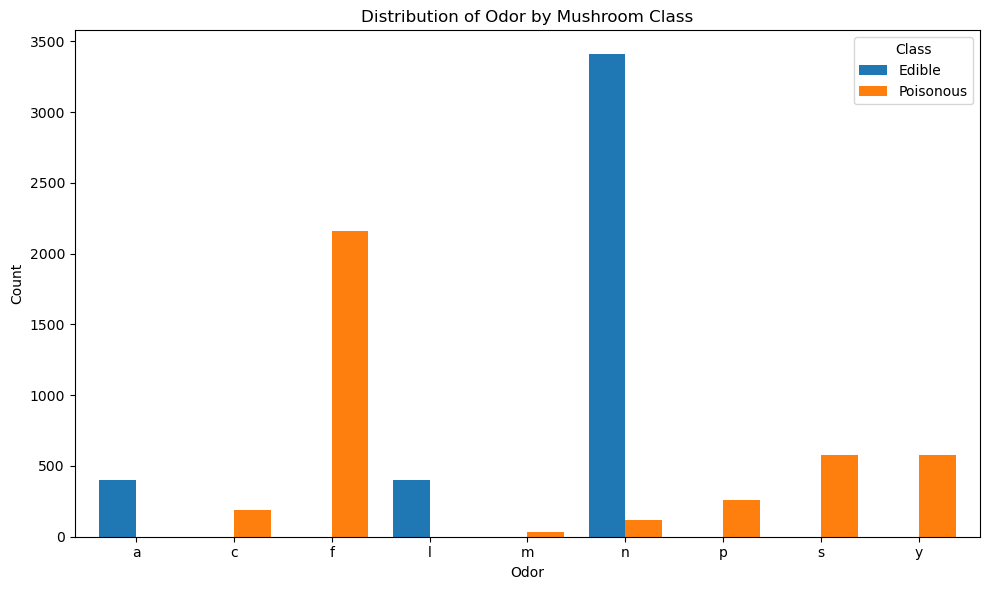

class,e,p
odor,,
a,400,0
c,0,192
f,0,2160
l,400,0
m,0,36
n,3408,120
p,0,256
s,0,576
y,0,576


In [217]:
# D.2: Distribution of Odors by Mushroom Class
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("mushrooms.csv")

# 2. Build contingency table of odor vs. class
odor_ct = pd.crosstab(df["odor"], df["class"])

# 3. Plot side-by-side bar chart
ax = odor_ct.plot(
    kind="bar",
    figsize=(10, 6),
    width=0.75
)
ax.set_title("Distribution of Odor by Mushroom Class")
ax.set_xlabel("Odor")
ax.set_ylabel("Count")
ax.legend(["Edible", "Poisonous"], title="Class", loc="upper right")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Show raw counts table
display(odor_ct)

### D3. Can we cluster mushrooms into visually similar groups (shape + color)?

- **Stakeholder:** App Developers  
- **Method:**
  1. Extract the `cap-shape` and `cap-color` features.
  2. Build a `Pipeline` that one-hot-encodes these via a `ColumnTransformer` and fits a `KMeans(n_clusters=4)`.
  3. Fit the pipeline and predict cluster labels.
  4. Project the one-hot matrix into 2D with `PCA` and plot a scatter, coloring points by cluster label.
  5. Tabulate the number of mushrooms per cluster and decode each cluster’s centroid back into its most-representative `(cap-shape, cap-color)` combination for interpretation.

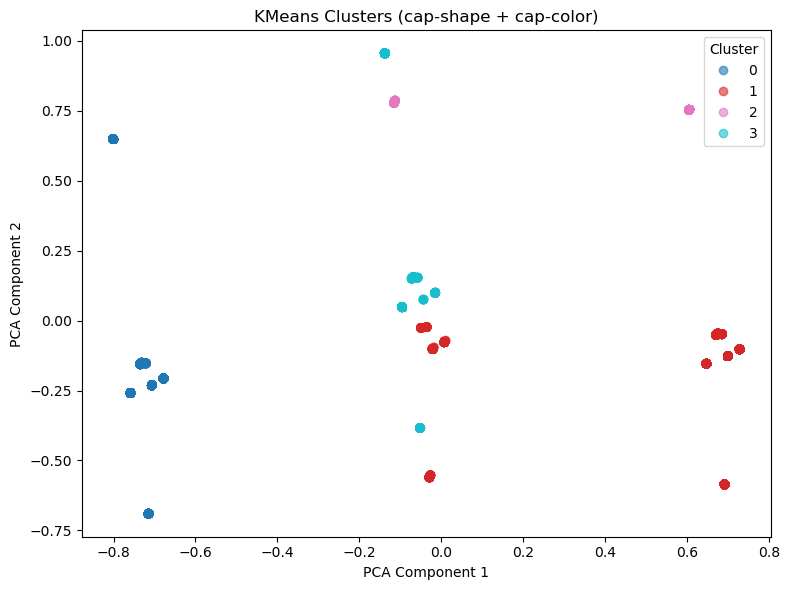

Cluster sizes:
 0    3152
1    3152
2     992
3     828
Name: count, dtype: int64

Cluster centroids (decoded):
    cap-shape cap-color
0  cap-shape         f
1  cap-shape         x
2  cap-color         n
3  cap-shape         k


In [219]:
# D3: KMeans clustering on cap-shape + cap-color with PCA visualization
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# 1. Load data & select features
df = pd.read_csv("mushrooms.csv")
features = ["cap-shape", "cap-color"]
X_raw = df[features]

# 2. Build pipeline: encode then KMeans
preprocessor = ColumnTransformer(
    [("ohe", OneHotEncoder(handle_unknown="ignore"), features)],
    remainder="drop"
)
pipe = Pipeline([
    ("encode", preprocessor),
    ("kmeans", KMeans(n_clusters=4, random_state=42))
])

# 3. Fit & predict clusters
clusters = pipe.fit_predict(X_raw)

# 4. PCA projection for plotting
X_enc = pipe.named_steps["encode"].transform(X_raw)
# if sparse, convert to dense
if hasattr(X_enc, "toarray"):
    X_enc = X_enc.toarray()
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_enc)

# 5. Plot clusters in 2D
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap="tab10", alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("KMeans Clusters (cap-shape + cap-color)")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

# Tabulate cluster sizes
cluster_sizes = pd.Series(clusters).value_counts().sort_index()
print("Cluster sizes:\n", cluster_sizes)

# Decode each cluster’s centroid back to cap-shape + cap-color
# Get the two-way OHE feature names
ohe = pipe.named_steps["encode"].named_transformers_["ohe"]
feat_names = ohe.get_feature_names_out(features)
# Compute cluster-centroid in OHE-space
centroids = pipe.named_steps["kmeans"].cluster_centers_
# For each centroid, pick the highest-value OHE column as representative
decoded = []
for ctr in centroids:
    top_idx = ctr.argmax()
    name = feat_names[top_idx]
    # split back into (feature, category)
    feat, cat = name.split("_", 1)
    decoded.append((feat, cat))
centroid_df = pd.DataFrame(decoded, columns=features)
print("\nCluster centroids (decoded):\n", centroid_df)

### D.4 How does the combination of cap color and bruising relate to toxicity?
- **Stakeholder:** Park Rangers  
- **Method:**
  1. Load the dataset and extract the `cap-color`, `bruises`, and `class` columns.  
  2. Build a pivot table of raw counts of edible vs. poisonous mushrooms for each `(cap-color, bruises)` combination.  
  3. Print the raw counts pivot for reference.  
  4. Normalize each row to proportions (across edible vs. poisonous).  
  5. Visualize the normalized proportions as a grouped heatmap, annotating each cell.  

Raw counts of edible vs. poisonous by (cap-color, bruises):



class                e    p
cap-color bruises          
b         t         48  120
c         f         24   12
          t          8    0
e         f          0  876
          t        624    0
g         f        448  712
          t        584   96
n         f        536  892
          t        728  128
p         f          0   64
          t         56   24
r         f         16    0
u         f         16    0
w         f        416   64
          t        304  256
y         f          0  672
          t        400    0

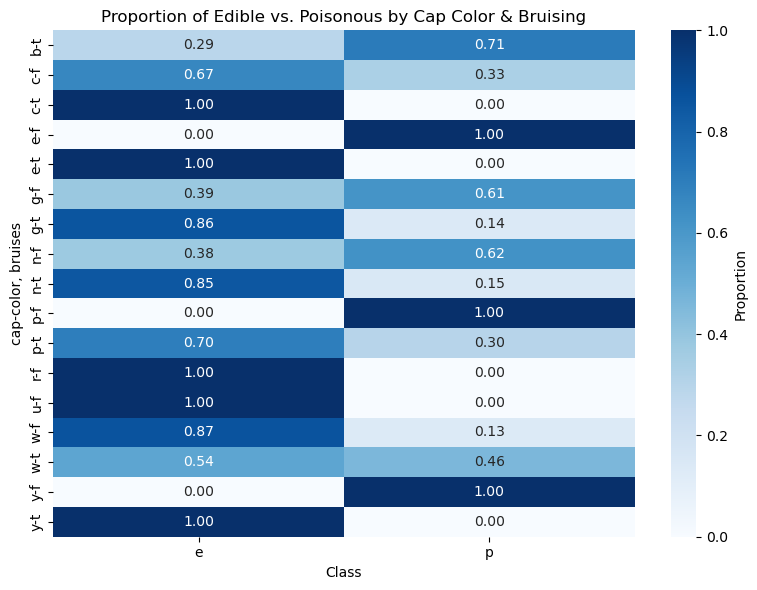

In [224]:
# D.4: Cap-color + bruises vs. toxicity
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv("mushrooms.csv")

# 2. Build pivot: raw counts of edible vs. poisonous per cap-color/bruises combo
pivot_counts = (
    df
    .groupby(['cap-color', 'bruises', 'class'])
    .size()
    .unstack(fill_value=0)
)

# 3. Print raw counts pivot
print("Raw counts of edible vs. poisonous by (cap-color, bruises):\n")
display(pivot_counts)

# 4. Normalize to proportions across each row
pivot_prop = pivot_counts.div(pivot_counts.sum(axis=1), axis=0)

# 5. Plot grouped heatmap of proportions
plt.figure(figsize=(8,6))
sns.heatmap(
    pivot_prop,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    cbar_kws={'label': 'Proportion'}
)
plt.title("Proportion of Edible vs. Poisonous by Cap Color & Bruising")
plt.xlabel("Class")
plt.ylabel("cap-color, bruises")
plt.tight_layout()
plt.show()

### D5. What’s the cross-validated accuracy of a single-feature logistic model using only `odor`?

- **Stakeholder:** Healthcare Providers  
- **Method:**
  1. Load the dataset and extract `odor` plus target `class`.  
  2. One-hot encode the `odor` feature.  
  3. Map `class` to binary labels (edible = 0, poisonous = 1).  
  4. Fit a logistic regression with 5-fold cross-validation and report mean accuracy.

In [227]:
# D5: Single-feature logistic regression on 'odor'
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

# 1. Load data
df = pd.read_csv("mushrooms.csv")

# 2. Encode odor
encoder = OneHotEncoder(sparse_output=False)
X = encoder.fit_transform(df[['odor']])

# 3. Binary target
y = df['class'].map({'e': 0, 'p': 1})

# 4. Logistic regression with cross-validation
model = LogisticRegression(max_iter=500)
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-validated accuracies: {scores}")
print(f"Mean accuracy: {scores.mean():.3f}")

Cross-validated accuracies: [0.99938462 0.99138462 0.94030769 1.         0.99507389]
Mean accuracy: 0.985


### D6. Are there habitats where mushrooms are almost always edible or always poisonous?

- **Stakeholder:** Foragers & Hobbyists  
- **Method:**
  1. Load the dataset and extract `habitat` and target `class`.  
  2. Group by `habitat` and compute the proportion of edible vs. poisonous mushrooms.  
  3. Plot these proportions as a stacked bar chart to highlight habitats dominated by one class.

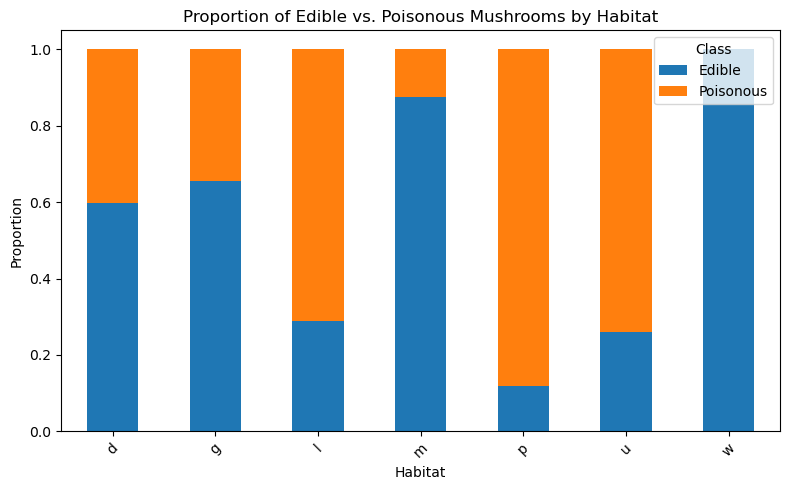

In [230]:
# D6: Habitat-wise edible vs. poisonous proportions
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data
df = pd.read_csv("mushrooms.csv")

# 2. Compute proportions
ct = pd.crosstab(df['habitat'], df['class'], normalize='index')

# 3. Plot stacked bar chart
ax = ct.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    title='Proportion of Edible vs. Poisonous Mushrooms by Habitat'
)
ax.set_xlabel('Habitat')
ax.set_ylabel('Proportion')
ax.legend(['Edible', 'Poisonous'], title='Class', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### D7. Which features have zero variance or any missing values and should be dropped?

- **Stakeholder:** Data Engineers  
- **Method:**
  1. Reuse the `overview` DataFrame from Section B that lists `n_unique` and `n_missing` for each feature.  
  2. Filter to features where `n_unique == 1` or `n_missing > 0`.  
  3. Display the filtered list and recommend dropping them.

In [233]:
# D7: Identify zero-variance or missing-value features
import pandas as pd

# Assume `overview` was already built as in Section B:
# overview = pd.DataFrame({
#     'feature': df.columns,
#     'dtype': df.dtypes.values,
#     'n_unique': [df[col].nunique() for col in df.columns],
#     'n_missing': [df[col].isna().sum() for col in df.columns]
# })

# 1. Filter features with zero variance or missing values
drop_candidates = overview[
    (overview['n_unique'] == 1) |
    (overview['n_missing'] > 0)
].copy()

# 2. Show the results
drop_candidates

,feature,dtype,n_unique,n_missing
16,veil-type,object,1,0


### D8. Can we reduce dimensionality and still separate edible vs. poisonous?

- **Stakeholder:** App Developers  
- **Method:**
  1. One-hot encode all 22 input features (drop `class`).  
  2. Apply PCA to reduce to 2 principal components.  
  3. Plot a scatter of the two PCA dimensions, coloring points by `class`.

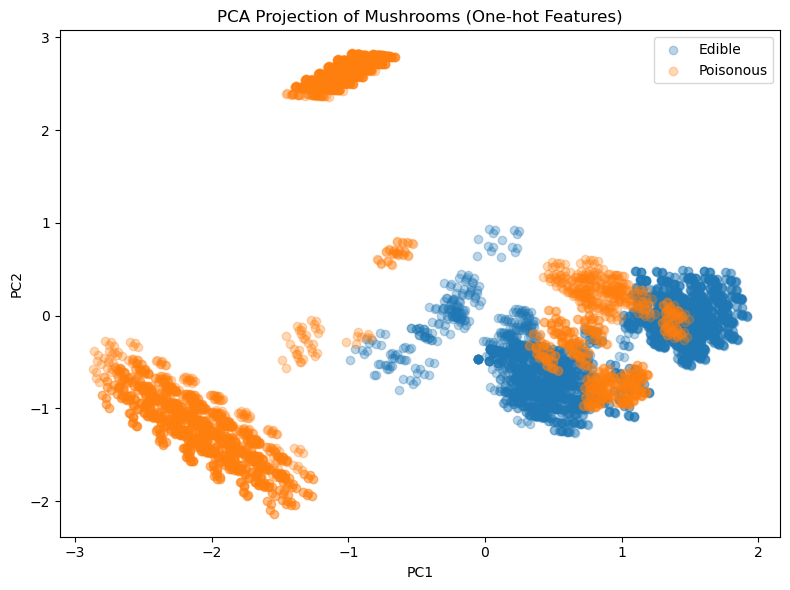

In [236]:
# D8: PCA on one-hot encoded features and 2D scatter by class
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Load and prepare data
df = pd.read_csv("mushrooms.csv")
X = pd.get_dummies(df.drop(columns="class"))   # one-hot encode
y = df["class"]                                 # 'e' or 'p'

# 2. Apply PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

# 3. Plot results
plt.figure(figsize=(8,6))
for label, color in zip(['e','p'], ['green','red']):
    mask = y == label
    plt.scatter(X_pca[mask,0], X_pca[mask,1],
                label=('Edible' if label=='e' else 'Poisonous'),
                alpha=0.3)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of Mushrooms (One-hot Features)")
plt.legend()
plt.tight_layout()
plt.show()

### D9. How does prediction confidence vary across true-positive vs. false-positive mushrooms?

- **Stakeholder:** Park Rangers  
- **Method:**  
  1. Split data into train/test sets.  
  2. Train a Random Forest on the training data.  
  3. Use `predict_proba` on the test set to get the probability of “poisonous.”  
  4. Identify true positives (actual poisonous predicted as poisonous) and false positives (actual edible predicted as poisonous).  
  5. Plot overlaid histograms of their predicted-probability distributions.

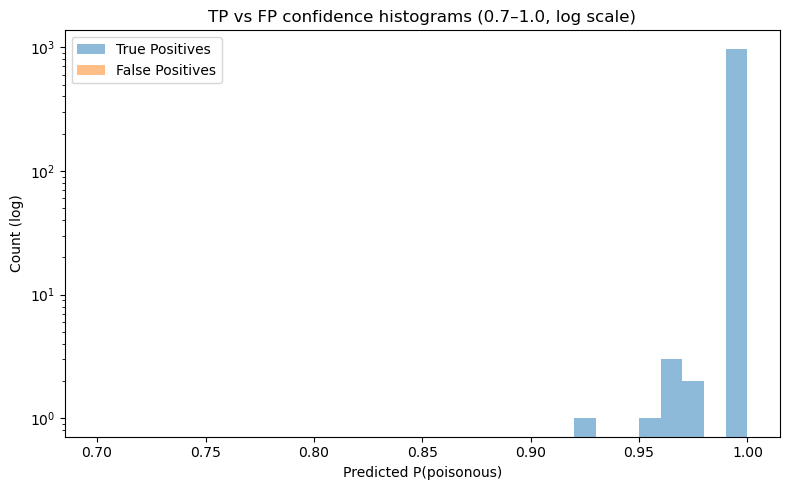

In [252]:
# D9: TP vs FP confidence histograms
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("mushrooms.csv")
X = pd.get_dummies(df.drop(columns="class"))
y = df["class"].map({"e":0, "p":1})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42
)

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
proba = rf.predict_proba(X_test)[:, 1]
pred  = rf.predict(X_test)

tp = proba[(y_test==1)&(pred==1)]
fp = proba[(y_test==0)&(pred==1)]

plt.figure(figsize=(8,5))
plt.hist(tp, bins=30, range=(0.7,1.0), alpha=0.5, label="True Positives")
plt.hist(fp, bins=30, range=(0.7,1.0), alpha=0.5, label="False Positives")
plt.yscale("log")
plt.legend()
plt.title("TP vs FP confidence histograms (0.7–1.0, log scale)")
plt.xlabel("Predicted P(poisonous)")
plt.ylabel("Count (log)")
plt.tight_layout()
plt.show()

#### D10. If we remove the top 3 most important features, how does model performance degrade?

- **Stakeholder:** Data Scientists  
- **Method:**  
  1. Identify the top-3 features by importance from a Random Forest trained on all features.  
  2. Iteratively drop those top-3 features one at a time (first drop the single most important, then drop the top 2, then drop the top 3), retrain the model each time.  
  3. For each retrained model, compute and report accuracy and ROC AUC on the held-out test set.  
  4. Plot accuracy and AUC as a function of number of dropped features (0, 1, 2, 3).

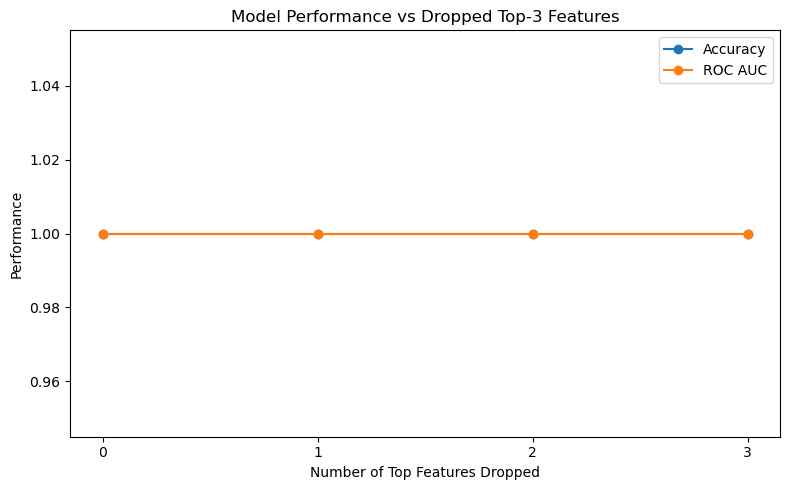

   n_dropped  accuracy  roc_auc
0          0       1.0      1.0
1          1       1.0      1.0
2          2       1.0      1.0
3          3       1.0      1.0


In [254]:
# D10: Feature-drop degradation curves
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

df = pd.read_csv("mushrooms.csv")
X_full = pd.get_dummies(df.drop(columns="class"))
y = df["class"].map({"e":0, "p":1})

X_tr, X_te, y_tr, y_te = train_test_split(
    X_full, y, stratify=y, random_state=42
)

# baseline RF to get top-3 features
rf0 = RandomForestClassifier(n_estimators=200, random_state=42)
rf0.fit(X_tr, y_tr)
imp = pd.Series(
    rf0.feature_importances_, index=X_full.columns
).sort_values(ascending=False)
top3 = imp.head(3).index.tolist()

results = {"n_dropped": [], "accuracy": [], "roc_auc": []}
for k in range(4):
    drop = top3[:k]
    Xt = X_tr.drop(columns=drop)
    Xv = X_te.drop(columns=drop)
    rf = RandomForestClassifier(n_estimators=200, random_state=42)
    rf.fit(Xt, y_tr)
    yp = rf.predict(Xv)
    pp = rf.predict_proba(Xv)[:,1]
    results["n_dropped"].append(k)
    results["accuracy"].append(accuracy_score(y_te, yp))
    results["roc_auc"].append(roc_auc_score(y_te, pp))

df_res = pd.DataFrame(results)
plt.figure(figsize=(8,5))
plt.plot(df_res["n_dropped"], df_res["accuracy"], marker="o", label="Accuracy")
plt.plot(df_res["n_dropped"], df_res["roc_auc"], marker="o", label="ROC AUC")
plt.xticks([0,1,2,3])
plt.xlabel("Number of Top Features Dropped")
plt.ylabel("Performance")
plt.title("Model Performance vs Dropped Top‐3 Features")
plt.legend()
plt.tight_layout()
plt.show()

print(df_res)